<a href="https://colab.research.google.com/github/KetakiN/Springboard/blob/main/NYSDOH_EDA_KetakiNagarkar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import t
from scipy.stats import stats
from google.colab import files


In [2]:
df=pd.read_csv('/content/sample_data/NYSDOH_clean.csv')

In [3]:
df.shape

(118051, 37)

In [4]:
df=df.drop('Unnamed: 0',axis=1)

In [5]:
df.columns

Index(['Unnamed:_0', 'Hospital_Service_Area', 'Hospital_County',
       'Operating_Certificate_Number', 'Permanent_Facility_Id',
       'Facility_Name', 'Age_Group', 'Zip_Code__3_digits', 'Gender', 'Race',
       'Ethnicity', 'Length_of_Stay', 'Type_of_Admission',
       'Patient_Disposition', 'Discharge_Year', 'CCS_Diagnosis_Code',
       'CCS_Diagnosis_Description', 'CCS_Procedure_Code',
       'CCS_Procedure_Description', 'APR_DRG_Code', 'APR_DRG_Description',
       'APR_MDC_Code', 'APR_MDC_Description', 'APR_Severity_of_Illness_Code',
       'APR_Severity_of_Illness_Description', 'APR_Risk_of_Mortality',
       'APR_Medical_Surgical_Description', 'Payment_Typology_1',
       'Payment_Typology_2', 'Payment_Typology_3', 'Birth_Weight',
       'Abortion_Edit_Indicator', 'Emergency_Department_Indicator',
       'Total_Charges', 'Total_Costs',
       'Ratio_of_Total_Costs_to_Total_Charges'],
      dtype='object')

In [6]:
df.Length_of_Stay.dtype

dtype('float64')

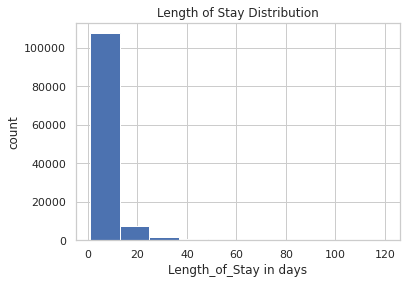

In [7]:
# Target variable is length of stay, univariate data analysis of target
sns.set_theme(style="whitegrid")
plt.hist(df['Length_of_Stay'])
plt.xlabel('Length_of_Stay in days')
plt.ylabel('count')
plt.title('Length of Stay Distribution')
plt.gcf().subplots_adjust(left=0.15)
#plt.savefig('length.png')
#files.download('length.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

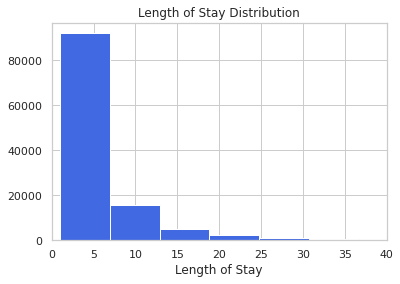

In [8]:
ax=plt.hist(df['Length_of_Stay'],bins=20,color='royalblue')
plt.xlim(0,40)
plt.xlabel('Length of Stay')

plt.title('Length of Stay Distribution')

plt.savefig('lenbar.png')
files.download('lenbar.png')
plt.show()

In [9]:
df['Length_of_Stay'].describe()

count    118051.000000
mean          5.503494
std           8.104572
min           1.000000
25%           2.000000
50%           3.000000
75%           6.000000
max         120.000000
Name: Length_of_Stay, dtype: float64

In [10]:
#the mean length of stay is 5.5 days while the median is 3.00 days. 
#"There are some extreme values such as maximum length of stay which is 120"
# Lets take a look and see how many of the patients have a length of stay above the mean and below the mean

In [11]:
conditions=[(df['Length_of_Stay']<=5.5), (df['Length_of_Stay']>5.5)]
values=['below_mean','above_mean']
df['Length_groups']=np.select(conditions,values)

In [12]:
# A significant percentage (approximately 73%) of the pateint population has length of stay at or  below the mean
numbelow=(df[df['Length_groups']=='below_mean'])
percent_below_mean=((numbelow['Length_groups'].value_counts()*100)/236147)
print('percentage of patients with length of stay below mean is :{}'.format(percent_below_mean))

percentage of patients with length of stay below mean is :below_mean    36.476432
Name: Length_groups, dtype: float64


In [13]:
numabove=(df[df['Length_groups']=='above_mean'])
percent_above_mean=((numabove['Length_groups'].value_counts()*100)/236147)
mean_orlower=percent_below_mean
higherthan_mean=percent_above_mean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


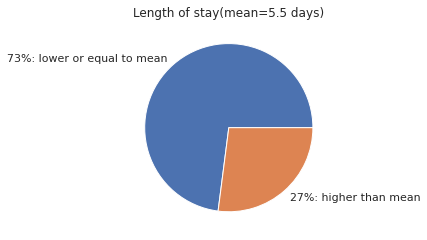

In [14]:
data=[mean_orlower,higherthan_mean]
labels=['73%: lower or equal to mean','27%: higher than mean'] 
plt.pie(data, labels = labels)
plt.title('Length of stay(mean=5.5 days)')
plt.gcf().subplots_adjust(bottom=0.15)
#plt.savefig('pie.png')
plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


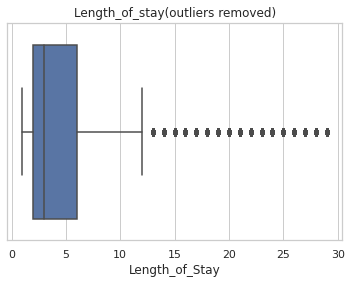

In [15]:
# Remove 5% outliers from length of stay
std=df['Length_of_Stay'].std()
mean=df['Length_of_Stay'].mean()
cutoff=std*3
lower,upper=mean-cutoff,mean+cutoff
trimmed_df=df[(df['Length_of_Stay']>lower)&(df['Length_of_Stay']<upper)]
sns.boxplot(trimmed_df['Length_of_Stay'])
plt.title('Length_of_stay(outliers removed)')
#plt.savefig('box_length.png')

plt.show()

In [16]:
trimmed_df.Length_of_Stay.describe()

count    116068.000000
mean          4.733501
std           4.637883
min           1.000000
25%           2.000000
50%           3.000000
75%           6.000000
max          29.000000
Name: Length_of_Stay, dtype: float64

It appears that min length of stay is same (1 day) but the max length of stay is 27 days( dropped down from 120 days after outliers have been removed)

In [17]:
outlier_length=df[df['Length_of_Stay']>27]

In [18]:
outlier_length.head(10)

,Unnamed:_0,Hospital_Service_Area,Hospital_County,Operating_Certificate_Number,Permanent_Facility_Id,Facility_Name,Age_Group,Zip_Code__3_digits,Gender,Race,Ethnicity,Length_of_Stay,Type_of_Admission,Patient_Disposition,Discharge_Year,CCS_Diagnosis_Code,CCS_Diagnosis_Description,CCS_Procedure_Code,CCS_Procedure_Description,APR_DRG_Code,APR_DRG_Description,APR_MDC_Code,APR_MDC_Description,APR_Severity_of_Illness_Code,APR_Severity_of_Illness_Description,APR_Risk_of_Mortality,APR_Medical_Surgical_Description,Payment_Typology_1,Payment_Typology_2,Payment_Typology_3,Birth_Weight,Abortion_Edit_Indicator,Emergency_Department_Indicator,Total_Charges,Total_Costs,Ratio_of_Total_Costs_to_Total_Charges,Length_groups
32,32,Western NY,Erie,1401014.0,207.0,Buffalo General Medical Center,50 to 69,140,M,White,Not Span/Hispanic,53.0,Emergency,Home or Self Care,2014,2,Septicemia (except in labor),216,RESP INTUB/MECH VENTIL,5,Tracheostomy w MV 96+ hours w/o extensive proc...,18,"Infectious and Parasitic Diseases, Systemic or...",4,Extreme,Extreme,Surgical,Medicare,Self-Pay,Unknown,0,N,Y,"360,502.48","135,255.67",0.375187,above_mean
42,42,Western NY,Erie,1401014.0,207.0,Buffalo General Medical Center,50 to 69,147,M,White,Not Span/Hispanic,41.0,Elective,Skilled Nursing Home,2014,254,Rehabilitation care; fitting of prostheses; an...,213,"PHYS THER EXER, MANIPUL",860,Rehabilitation,23,"Rehabilitation, Aftercare, Other Factors Influ...",4,Extreme,Major,Medical,Blue Cross/Blue Shield,Self-Pay,Unknown,0,N,N,"131,885.19","52,336.64",0.396835,above_mean
90,90,Western NY,Erie,1401014.0,208.0,Women And Children's Hospital Of Buffalo,0 to 17,140,M,Other Race,Not Span/Hispanic,44.0,Newborn,Home w/ Home Health Services,2014,218,Liveborn,216,RESP INTUB/MECH VENTIL,602,Neonate bwt 1000-1249g w resp dist synd/oth ma...,15,Newborns and Other Neonates with Conditions Or...,3,Major,Major,Medical,Medicaid,Self-Pay,Unknown,1200,N,N,"277,848.78","78,704.14",0.283262,above_mean
94,94,Western NY,Erie,1401014.0,207.0,Buffalo General Medical Center,70 or Older,140,M,White,Not Span/Hispanic,36.0,Urgent,Skilled Nursing Home,2014,254,Rehabilitation care; fitting of prostheses; an...,222,BLOOD TRANSFUSION,860,Rehabilitation,23,"Rehabilitation, Aftercare, Other Factors Influ...",3,Major,Major,Medical,Medicare,Self-Pay,Unknown,0,N,N,"111,423.39","45,263.58",0.406231,above_mean
127,127,Western NY,Erie,1401014.0,207.0,Buffalo General Medical Center,50 to 69,140,M,White,Not Span/Hispanic,37.0,Urgent,Skilled Nursing Home,2014,254,Rehabilitation care; fitting of prostheses; an...,0,NO PROC,860,Rehabilitation,23,"Rehabilitation, Aftercare, Other Factors Influ...",3,Major,Minor,Medical,Private Health Insurance,Self-Pay,Unknown,0,N,N,"108,995.39","44,242.37",0.405910,above_mean
292,293,Western NY,Erie,1401014.0,207.0,Buffalo General Medical Center,70 or Older,141,F,White,Not Span/Hispanic,31.0,Emergency,Skilled Nursing Home,2014,143,Abdominal hernia,86,OTHER HERNIA REPAIR,220,"Major stomach, esophageal & duodenal procedures",6,Diseases and Disorders of the Digestive System,4,Extreme,Extreme,Surgical,Medicare,Self-Pay,Unknown,0,N,Y,"167,114.92","72,462.04",0.433606,above_mean
375,377,Western NY,Erie,1401014.0,207.0,Buffalo General Medical Center,18 to 29,142,M,White,Not Span/Hispanic,44.0,Emergency,Skilled Nursing Home,2014,122,Pneumonia (except that caused by tuberculosis ...,216,RESP INTUB/MECH VENTIL,5,Tracheostomy w MV 96+ hours w/o extensive proc...,4,Diseases and Disorders of the Respiratory System,3,Major,Major,Surgical,Medicare,Medicaid,Self-Pay,0,N,Y,"219,718.44","85,409.27",0.388721,above_mean
413,415,Western NY,Chautauqua,602001.0,103.0,Woman's Christian Association,18 to 29,0,M,White,Not Span/Hispanic,28.0,Elective,Home or Self Care,2014,661,Substance-related disorders,219,ALCO/DRUG REHAB/DETOX,772,Alcohol & drug dependence w rehab or rehab/det...,20,Alcohol/Drug Use and Alcohol/Drug Induced Orga...,2,Moderate,Minor,Medical,Medicare,Medicare,Medicaid,0,N,N,"22,644.95","15,672.

In [19]:
df.Gender.unique()

array(['F', 'M', 'U'], dtype=object)

In [20]:
# Explore 'U' category of gender,note how many such records are there, if less than 50, drop them.
dfunkngen=df[df['Gender']=='U']
dfunkngen.shape

(2, 37)

In [21]:
# only two records, this will be dropped
Udrop=df[df['Gender']=='U'].index
df=df.drop(Udrop,axis=0)

In [22]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

<function matplotlib.pyplot.show>

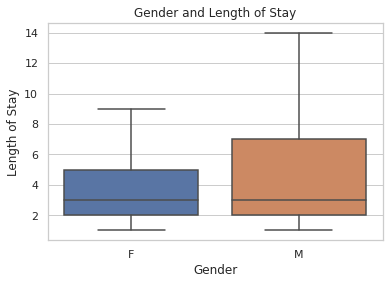

In [23]:
sns.boxplot(x='Gender',y='Length_of_Stay',data=df,showfliers=False)
plt.xlabel('Gender')
plt.ylabel('Length of Stay')
plt.title('Gender and Length of Stay')
#plt.savefig('genderbox.png')
plt.show
#files.download('genderbox.png')

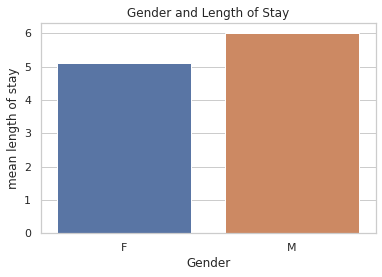

In [24]:
# Create Gender bar plot and check for statistical significance
dfgen=df.groupby('Gender')['Length_of_Stay'].mean().reset_index()

sns.barplot(x='Gender',y='Length_of_Stay',data=dfgen,ci='sd')
plt.xlabel('Gender')
plt.ylabel('mean length of stay')
plt.title('Gender and Length of Stay')
plt.gcf().subplots_adjust(bottom=0.15)
#plt.savefig('genderbar.png')
plt.show()


In [25]:
# Males have a higher mean length of stay compared to females
# Complete an independent t-test between male and female gender groups
male=df[df['Gender']=='M']
a=male['Length_of_Stay']
female=df[df['Gender']=='F']
b=female['Length_of_Stay']
stats.ttest_ind(a,b)

Ttest_indResult(statistic=18.66604546454611, pvalue=1.21062945743352e-77)

In [26]:
# lets take a look at 13 features to see if there is any variability in the length of stay amongst these featurs. 
#define function to plot a bar graph for each feature against length of stay and describe 
def plotbar(x):
    dfh=pd.DataFrame(df.groupby(x).Length_of_Stay.mean(),columns=(x,'Length_of_Stay'))
    dfh=dfh.sort_values('Length_of_Stay')
    dfh.describe()
    dfh.head(10).plot(kind='barh') 
    plt.xlabel('length of stay in days')
    plt.ylabel(str(x))
    y=str(x)+' tail 10 table'
    plt.title(str(y))
    strx=str(x)+'head_barh.png'
    #plt.savefig(strx)
    dfh.tail(10).plot(kind='barh')
    plt.xlabel('length of stay in days')
    plt.ylabel(str(x))
    y=str(x)+' head 10 table'
    plt.title(str(y))
    strx=str(x)+'tail_barh.png'
    #plt.savefig(strx)
    
    print(dfh.describe())

       Length_of_Stay
count      257.000000
mean         5.811454
std          3.927735
min          1.000000
25%          3.333333
50%          4.807980
75%          7.169666
max         29.136364


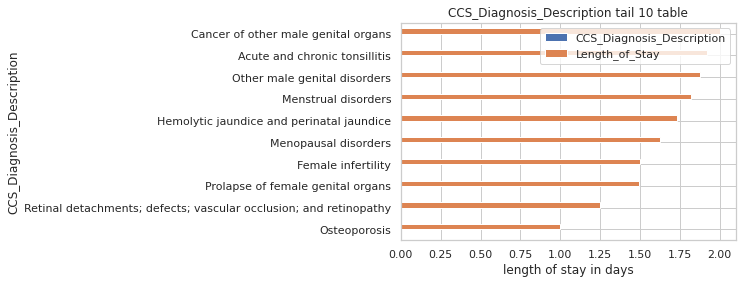

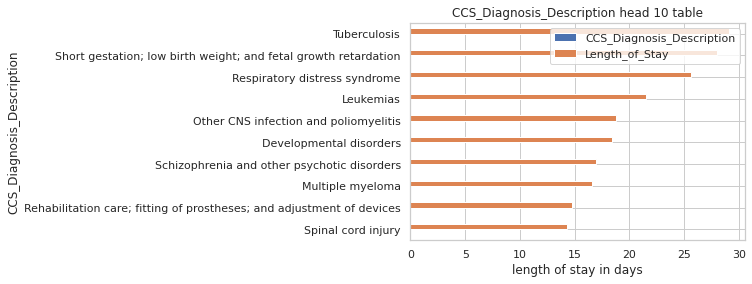

In [27]:
plotbar('CCS_Diagnosis_Description')

In [28]:
# visually we can see that there is a large amount of variablility of out target variable within the 258 CCS diagnosis description groups 

In [29]:
# There are 258 different types of diagnosis categories.Lets take a look at the top 2 most occurring
common_diag=df[df.groupby('CCS_Diagnosis_Description')['CCS_Diagnosis_Description'].transform('size') >4000]


In [30]:
common_diag['CCS_Diagnosis_Description'].unique()

array(['Liveborn', 'Septicemia (except in labor)'], dtype=object)

In [31]:
common_diag['CCS_Diagnosis_Description'].unique().shape

(2,)

In [32]:
# calculate statistical significance using an independent t-test for the two most commonly occuring diagnosis
liveborn=common_diag[common_diag['CCS_Diagnosis_Description']=='Liveborn']
sep=common_diag[common_diag['CCS_Diagnosis_Description']=='Septicemia (except in labor)']
a=np.array(liveborn['Length_of_Stay'])
b=np.array(sep['Length_of_Stay'])
stats.ttest_ind(a,b)


Ttest_indResult(statistic=-41.88617436314813, pvalue=0.0)

In [33]:
# this shows that for the two most commonly occurring diagnosis, the difference in means is significant

       Length_of_Stay
count       10.000000
mean         5.544618
std          1.617465
min          4.125799
25%          4.373619
50%          4.986695
75%          6.389634
max          9.307971


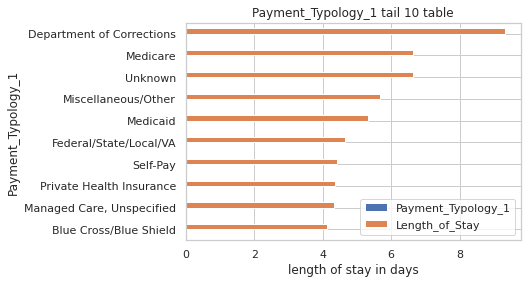

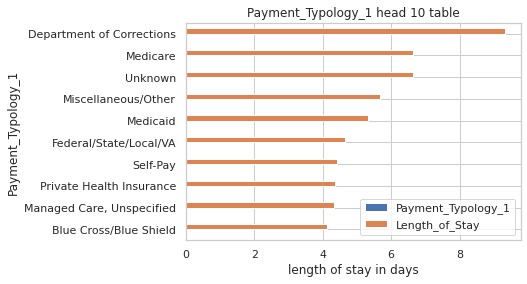

In [34]:
plotbar('Payment_Typology_1')

In [35]:
# calculate statistical signifcance of diffrence of mean length of stay among different payment type 1
a=df[df['Payment_Typology_1']=='Department of Corrections']['Length_of_Stay']
b=df[df['Payment_Typology_1']=='Medicaid']['Length_of_Stay']
c=df[df['Payment_Typology_1']=='Medicare']['Length_of_Stay']
d=df[df['Payment_Typology_1']=='Private Health Insurance']['Length_of_Stay']
e=df[df['Payment_Typology_1']=='Blue Cross/Blue Shield']['Length_of_Stay']
f=df[df['Payment_Typology_1']=='Federal/State/Local/VA']['Length_of_Stay']
g=df[df['Payment_Typology_1']=='Self-Pay']['Length_of_Stay']
h=df[df['Payment_Typology_1']=='Miscellaneous/Other']['Length_of_Stay']
i=df[df['Payment_Typology_1']=='Managed Care, Unspecified']['Length_of_Stay']
j=df[df['Payment_Typology_1']=='Unknown']['Length_of_Stay']
stats.f_oneway(a,b,c,d,e,f,g,h,i,j)

F_onewayResult(statistic=201.06447783573867, pvalue=0.0)

In [36]:
# lets create a subset of our common diagnosis dataframe where the most common 3 insurances were used: cdp
cdp=common_diag.loc[(common_diag['Payment_Typology_1']=='Medicaid')|(common_diag['Payment_Typology_1']=='Medicare')|(common_diag['Payment_Typology_1']=='Medicaid')|(common_diag['Payment_Typology_1']=='Private Health Insurance')]

In [37]:
cdp.head()

,Unnamed:_0,Hospital_Service_Area,Hospital_County,Operating_Certificate_Number,Permanent_Facility_Id,Facility_Name,Age_Group,Zip_Code__3_digits,Gender,Race,Ethnicity,Length_of_Stay,Type_of_Admission,Patient_Disposition,Discharge_Year,CCS_Diagnosis_Code,CCS_Diagnosis_Description,CCS_Procedure_Code,CCS_Procedure_Description,APR_DRG_Code,APR_DRG_Description,APR_MDC_Code,APR_MDC_Description,APR_Severity_of_Illness_Code,APR_Severity_of_Illness_Description,APR_Risk_of_Mortality,APR_Medical_Surgical_Description,Payment_Typology_1,Payment_Typology_2,Payment_Typology_3,Birth_Weight,Abortion_Edit_Indicator,Emergency_Department_Indicator,Total_Charges,Total_Costs,Ratio_of_Total_Costs_to_Total_Charges,Length_groups
2,2,Western NY,Chautauqua,601000.0,98.0,Brooks Memorial Hospital,0 to 17,140,M,White,Not Span/Hispanic,3.0,Newborn,Home or Self Care,2014,218,Liveborn,0,NO PROC,640,"Neonate birthwt >2499g, normal newborn or neon...",15,Newborns and Other Neonates with Conditions Or...,1,Minor,Minor,Medical,Medicaid,Unknown,Unknown,3500,N,N,"4,977.26","6,814.64",1.369155,below_mean
10,10,Western NY,Erie,1401014.0,208.0,Women And Children's Hospital Of Buffalo,0 to 17,140,M,White,Not Span/Hispanic,3.0,Newborn,Home or Self Care,2014,218,Liveborn,115,CIRCUMCISION,640,"Neonate birthwt >2499g, normal newborn or neon...",15,Newborns and Other Neonates with Conditions Or...,1,Minor,Minor,Medical,Private Health Insurance,Self-Pay,Unknown,2600,N,N,"4,437.50","2,775.12",0.625380,below_mean
16,16,Western NY,Erie,1401014.0,208.0,Women And Children's Hospital Of Buffalo,0 to 17,142,M,Black/African American,Not Span/Hispanic,2.0,Newborn,Home or Self Care,2014,218,Liveborn,115,CIRCUMCISION,640,"Neonate birthwt >2499g, normal newborn or neon...",15,Newborns and Other Neonates with Conditions Or...,1,Minor,Minor,Medical,Medicaid,Self-Pay,Unknown,3300,N,N,"3,176.00","1,904.87",0.599772,below_mean
28,28,Western NY,Erie,1401014.0,207.0,Buffalo General Medical Center,70 or Older,142,M,Black/African American,Not Span/Hispanic,13.0,Emergency,Skilled Nursing Home,2014,2,Septicemia (except in labor),54,OT VASC CATH; NOT HEART,710,Infectious & parasitic diseases including HIV ...,18,"Infectious and Parasitic Diseases, Systemic or...",4,Extreme,Extreme,Surgical,Medicare,Blue Cross/Blue Shield,Blue Cross/Blue Shield,0,N,Y,"64,007.16","27,677.42",0.432411,above_mean
32,32,Western NY,Erie,1401014.0,207.0,Buffalo General Medical Center,50 to 69,140,M,White,Not Span/Hispanic,53.0,Emergency,Home or Self Care,2014,2,Septicemia (except in labor),216,RESP INTUB/MECH VENTIL,5,Tracheostomy w MV 96+ hours w/o extensive proc...,18,"Infectious and Parasitic Diseases, Systemic or...",4,Extreme,Extreme,Surgical,Medicare,Self-Pay,Unknown,0,N,Y,"360,502.48","135,255.67",0.375187,above_mean


Text(0.5, 1.0, 'Common Diagnosis and Insurance')

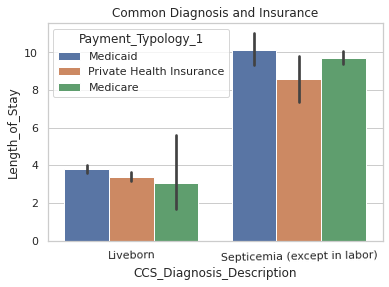

In [38]:
# Let us see the distribution of the most common diagnosis, variability with payment typology for length of stay
ax=sns.barplot(x='CCS_Diagnosis_Description',y='Length_of_Stay',hue='Payment_Typology_1',data=cdp)
plt.setp(ax.get_xticklabels(),rotation=1)
plt.title('Common Diagnosis and Insurance')
#plt.savefig('Diag_Insurance_length.png')

In [39]:
#files.download('Diag_Insurance_length.png')


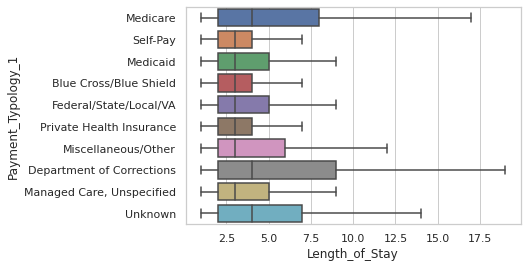

In [40]:
sns.boxplot(y='Payment_Typology_1',x='Length_of_Stay',data=df,showfliers=False,orient='h')

       Length_of_Stay
count       57.000000
mean         4.800299
std          0.850753
min          3.043478
25%          4.280000
50%          4.967010
75%          5.437862
max          7.031532


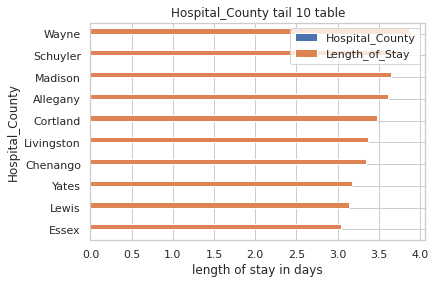

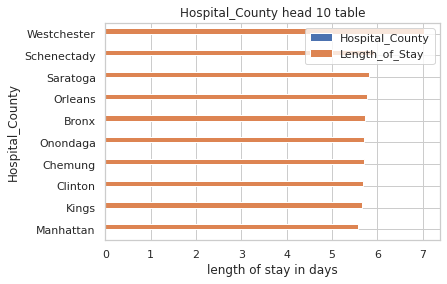

In [41]:
# look at each column of interest in the df_subset
plotbar('Hospital_County')

In [42]:
# there are 50 different counties, lets find the top two most utilsed counties and note if there is a significant difference in mean length of stay
common_county=df[df.groupby('Hospital_County')['Length_of_Stay'].transform('size') >10000]
common_county['Hospital_County'].unique().shape
common_county['Hospital_County'].unique()


array(['Kings', 'Manhattan'], dtype=object)

In [43]:
# calculate statistical significance using an independent t-test for the two most commonly used counties
Kings=common_county[common_county['Hospital_County']=='Kings']
Man=common_county[common_county['Hospital_County']=='Manhattan']
a=np.array(Kings['Length_of_Stay'])
b=np.array(Man['Length_of_Stay'])
stats.ttest_ind(a,b)


Ttest_indResult(statistic=0.7879482881898363, pvalue=0.4307325354461984)

In [44]:
# So the difference of means for the top 2 utilsed counties is not as significant. 
# But, based on the graph, the lowest mean length of stay is in Essex county at liitle more than 2.5 days and the most mean length of stay is at Westchester county more than 6.5 days

       Length_of_Stay
count        6.000000
mean         5.420660
std          1.070419
min          3.628678
25%          4.969596
50%          5.747637
75%          5.970582
max          6.644860


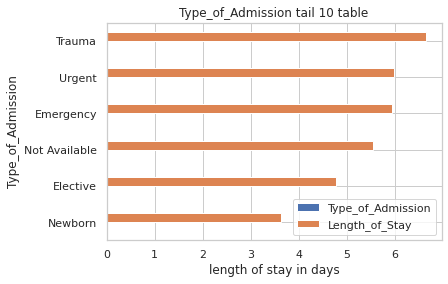

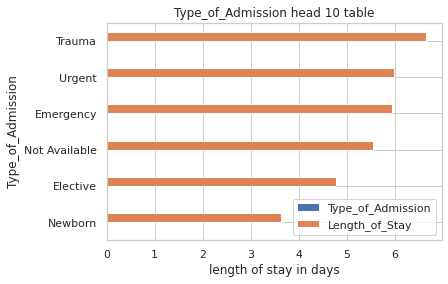

In [45]:
#It appears that people admitted for trauma have a higher mean length of stay than all the means of all the other categories

plotbar('Type_of_Admission')

In [46]:
# Run a one way ANOVA to check for statistical significance amongst different types of admissions
T=df[df['Type_of_Admission']=='Trauma']['Length_of_Stay']
U=df[df['Type_of_Admission']=='Urgent']['Length_of_Stay']
EM=df[df['Type_of_Admission']=='Emergency']['Length_of_Stay']
NA=df[df['Type_of_Admission']=='Not Available']['Length_of_Stay']
EL=df[df['Type_of_Admission']=='Elective']['Length_of_Stay']
N=df[df['Type_of_Admission']=='Newborn']['Length_of_Stay']
stats.f_oneway(T,U,EM,NA,EL,N)



F_onewayResult(statistic=213.9267005303843, pvalue=5.521832422616901e-228)

       Length_of_Stay
count        8.000000
mean         5.383265
std          0.313929
min          5.018893
25%          5.173215
50%          5.325856
75%          5.491709
max          6.030748


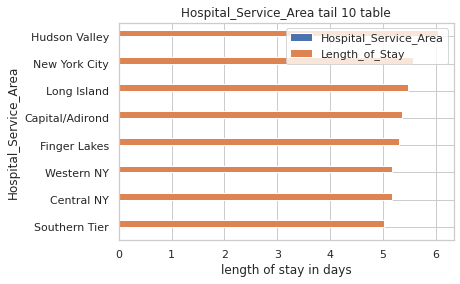

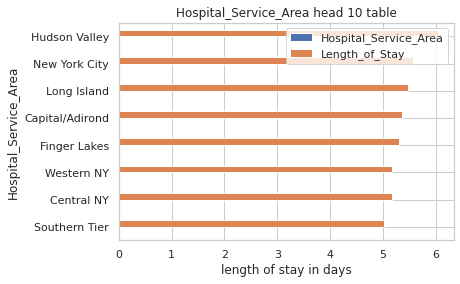

In [47]:
# it appears that the range of mean length of stay is between 5 and 6 days for Hopsital Service areas
plotbar('Hospital_Service_Area')

In [48]:
# Run a one way ANOVA to check for statistical significance amongst different types of hospital service areas


F=df[df['Hospital_Service_Area']=='Finger Lakes']['Length_of_Stay']
S=df[df['Hospital_Service_Area']=='Southern Tier']['Length_of_Stay']
C=df[df['Hospital_Service_Area']=='Capital/Adirond']['Length_of_Stay']
W=df[df['Hospital_Service_Area']=='Western NY']['Length_of_Stay']
CE=df[df['Hospital_Service_Area']=='Central NY']['Length_of_Stay']
stats.f_oneway(F,S,C,W,CE)

F_onewayResult(statistic=1.32531223330309, pvalue=0.2577846938927773)

       Length_of_Stay
count      227.000000
mean         6.356671
std          6.618243
min          2.000000
25%          4.155864
50%          5.003000
75%          6.089463
max         77.307692


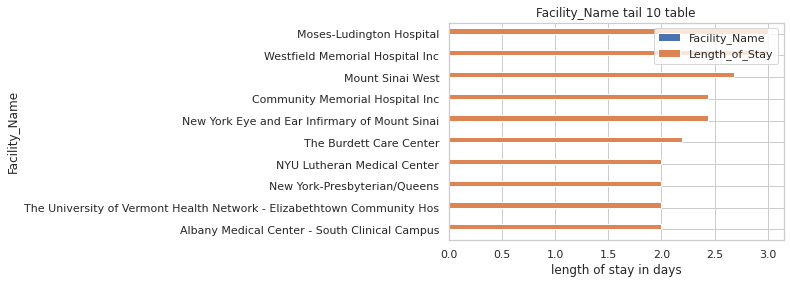

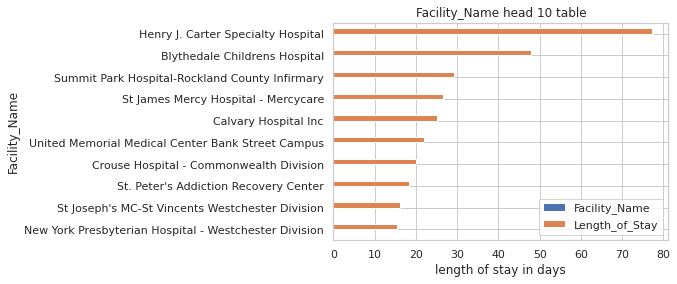

In [49]:
# There appears to be quite a large variablity in mean length of stay dpeending on the facility, 
#this is not surprisng as facilities may be be designated differently as trauma centers, rehabilitation hospitals etc
plotbar('Facility_Name')

In [50]:
# check for most commonly utilised facilities
common_fac=df[df.groupby('Facility_Name')['Facility_Name'].transform('size') >1000]
common_fac['Facility_Name'].unique()

array(['Buffalo General Medical Center', 'Mercy Hospital',
       'Rochester General Hospital', 'Strong Memorial Hospital',
       'St Josephs Hospital Health Center',
       'University Hospital SUNY Health Science Center',
       'Crouse Hospital', 'Albany Medical Center Hospital',
       'St Peters Hospital', 'Orange Regional Medical Center',
       'Westchester Medical Center',
       'Lincoln Medical & Mental Health Center',
       'Montefiore Medical Center - Henry & Lucy Moses Div',
       'Bronx-Lebanon Hospital Center - Concourse Division',
       'Montefiore Med Center - Jack D Weiler Hosp of A Einstein College Div',
       'Kings County Hospital Center', 'Lutheran Medical Center',
       'Maimonides Medical Center', 'New York Methodist Hospital',
       'Bellevue Hospital Center', 'Mount Sinai Beth Israel',
       'Lenox Hill Hospital',
       'Memorial Hospital for Cancer and Allied Diseases',
       'Mount Sinai Hospital',
       'New York Presbyterian Hospital - New York 

       Length_of_Stay
count       51.000000
mean         5.441561
std          0.461653
min          4.553571
25%          5.138226
50%          5.406586
75%          5.638896
max          6.926339


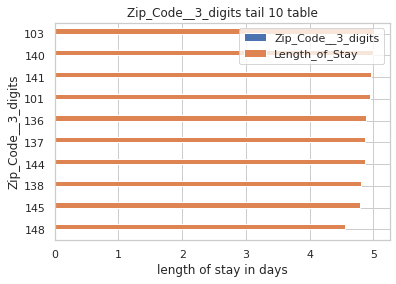

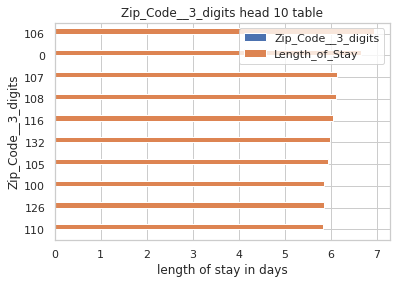

In [51]:
# it appears that there is some variability in mean length of stay by zipcode
plotbar('Zip_Code__3_digits')

In [52]:
# check for frequently utilised zip codes
common_zip=df[df.groupby('Zip_Code__3_digits')['Zip_Code__3_digits'].transform('size') > 5000]
common_zip['Zip_Code__3_digits'].unique()

array(['112', '100', '104', '117', '113'], dtype=object)

In [53]:
# check for statistical significance for most frequently utilised zip codes
a=df[df['Zip_Code__3_digits']=='112']['Length_of_Stay']
b=df[df['Zip_Code__3_digits']=='117']['Length_of_Stay']
c=df[df['Zip_Code__3_digits']=='104']['Length_of_Stay']
d=df[df['Zip_Code__3_digits']=='100']['Length_of_Stay']
e=df[df['Zip_Code__3_digits']=='113']['Length_of_Stay']
stats.f_oneway(a,b,c,d,e)

F_onewayResult(statistic=3.606056240883346, pvalue=0.006061905351653877)

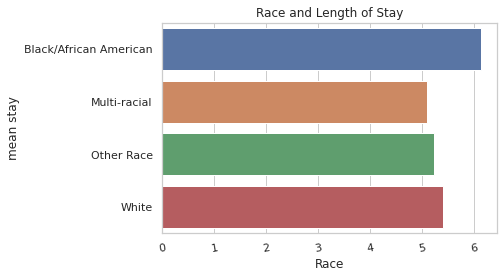

In [54]:
dfrace=df.groupby('Race')['Length_of_Stay'].mean().reset_index()
ax=sns.barplot(y='Race',x='Length_of_Stay',data=dfrace,orient='h')
plt.setp(ax.get_xticklabels(),rotation=10)
plt.xlabel('Race')
plt.ylabel('mean stay')
plt.title('Race and Length of Stay')
plt.gcf().subplots_adjust(bottom=0.15)
#plt.savefig('bar_race.png')
plt.show()

In [55]:
# Run a one way ANOVA to check for statistical significance
AA=df[df['Race']=='Black/African American']['Length_of_Stay']
MR=df[df['Race']=='Multi-racial']['Length_of_Stay']
WH=df[df['Race']=='White']['Length_of_Stay']
OR=df[df['Race']=='Other Race']['Length_of_Stay']
stats.f_oneway(AA,MR,WH,OR)

F_onewayResult(statistic=60.72970571233978, pvalue=3.183227560612563e-39)

       Length_of_Stay
count        4.000000
mean         5.122892
std          0.447595
min          4.566802
25%          4.879085
50%          5.165550
75%          5.409356
max          5.593668


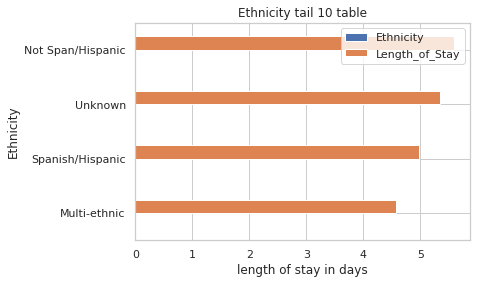

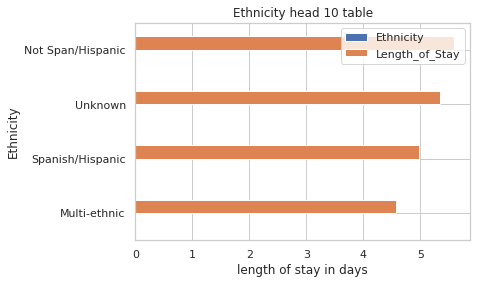

In [56]:
# in this feature the primary groups are Spanish/Hispanic and the other group categories are not as distinct, 
#this column due to lack of useful seperation of groups may be dropeed
plotbar('Ethnicity')

In [57]:
df=df.drop('Ethnicity',axis=1)

       Length_of_Stay
count      226.000000
mean         6.612059
std          4.799649
min          1.000000
25%          3.770158
50%          5.407746
75%          8.436314
max         38.865285


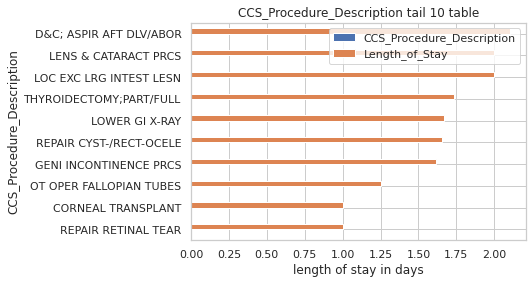

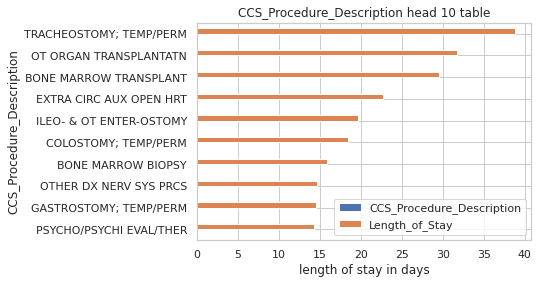

In [58]:
#there are 227 different types of CCS procedure groups with variability between the groups
plotbar('CCS_Procedure_Description')

In [59]:
common_proc=df[df.groupby('CCS_Procedure_Description')['CCS_Procedure_Description'].transform('size') > 8000]
common_proc['CCS_Procedure_Description'].unique().shape
common_proc['CCS_Procedure_Description'].unique()

array(['NO PROC'], dtype=object)

In [60]:
vac=df[df['CCS_Procedure_Description']=='PROPHYLACTIC VAC/INOCUL']
a=vac['Length_of_Stay']
ther=df[df['CCS_Procedure_Description']=='OTHER THERAPEUTIC PRCS']
b=ther['Length_of_Stay']
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-21.57450100853736, pvalue=2.529603386195047e-101)

In [61]:
# lets look at the top 5 most commonly utilsed CCS procedure descriptions 
common_proc=df[df.groupby('CCS_Procedure_Description')['CCS_Procedure_Description'].transform('size') > 7200]
common_proc['CCS_Procedure_Description'].unique().shape
common_proc['CCS_Procedure_Description'].unique()

array(['NO PROC', 'OTHER THERAPEUTIC PRCS'], dtype=object)

Text(0.5, 1.0, ' ')

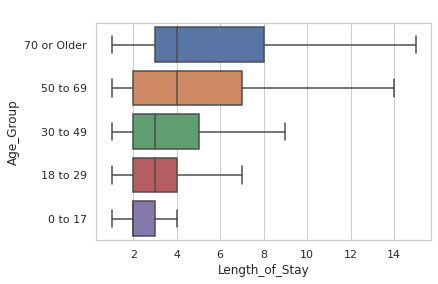

In [62]:
ax=sns.boxplot(y='Age_Group',x='Length_of_Stay',data=df,showfliers=False,order=['70 or Older','50 to 69','30 to 49','18 to 29','0 to 17'])
ax.set_title(' ')
#plt.savefig('AgeGenderbox.png')

In [63]:
#files.download('AgeGenderbox.png')

In [64]:
  # The 70 or older group seems to have a slightly higher mean length of stay compared to the other groups, 
# we will check for statistical signififcance for difference of means amongst different age groups using a one way ANOVA.

a=df[df['Age_Group']=='0 to 17']['Length_of_Stay']
b=df[df['Age_Group']=='18 to 29']['Length_of_Stay']
c=df[df['Age_Group']=='30 to 49']['Length_of_Stay']
d=df[df['Age_Group']=='50 to 69']['Length_of_Stay']
e=df[df['Age_Group']=='70 or Older']['Length_of_Stay']
stats.f_oneway(a,b,c,d,e)

F_onewayResult(statistic=411.58706008266785, pvalue=0.0)

       Length_of_Stay
count        2.000000
mean         5.438050
std          0.558283
min          5.043284
25%          5.240667
50%          5.438050
75%          5.635432
max          5.832815


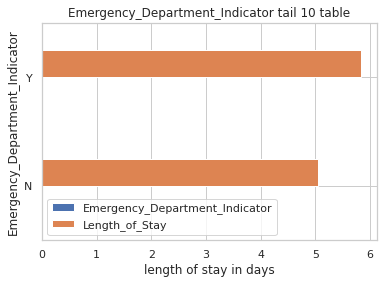

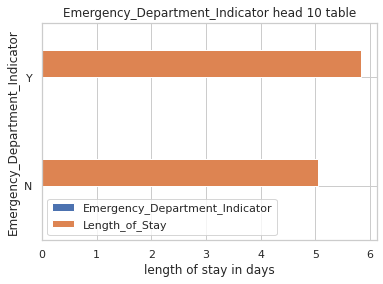

In [65]:
plotbar('Emergency_Department_Indicator')

In [66]:
a=df[df['Emergency_Department_Indicator']=='Y']['Length_of_Stay']
b=df[df['Emergency_Department_Indicator']=='N']['Length_of_Stay']
stats.ttest_ind(a,b)

Ttest_indResult(statistic=16.522558766271064, pvalue=2.9588780897410505e-61)

In [67]:
#df.to_csv('NYSDOH_clean2.csv')

In [68]:
#files.download('NYSDOH_clean2.csv')